In [ ]:
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 8.2 MB/s eta 0:00:00


In [ ]:
import tslearn
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import numpy as np


In [ ]:
data = '/content/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(data, sep=',')
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,206943,207037,207084,207146,207190,207239,207262,207310,207399,207438
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333635,333650,333653,333686,333708,333708,333731,333749,333749,333751
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271168,271174,271179,271182,271186,271190,271193,271194,271198,271198
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47606,47606,47606,47686,47686,47686,47686,47686,47686,47686
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104946,104946,104946,104946,104973,104973,104973,104973,104973,104973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333746,333746,333746,333746,333746,333905,334021,334021,334021,334066


In [ ]:
df = df.drop(df.columns[4:700], axis=1)
df

,Province/State,Country/Region,Lat,Long,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.939110,67.709953,157745,157787,157797,157816,157841,157878,...,206943,207037,207084,207146,207190,207239,207262,207310,207399,207438
1,NaN,Albania,41.153300,20.168300,205549,205777,205897,206273,206616,206935,...,333635,333650,333653,333686,333708,333708,333731,333749,333749,333751
2,NaN,Algeria,28.033900,1.659600,214330,214592,214835,215145,215430,215723,...,271168,271174,271179,271182,271186,271190,271193,271194,271198,271198
3,NaN,Andorra,42.506300,1.521800,20549,20549,21062,21062,21372,21571,...,47606,47606,47606,47686,47686,47686,47686,47686,47686,47686
4,NaN,Angola,-11.202700,17.873900,65868,65938,66086,66566,67199,68362,...,104946,104946,104946,104946,104973,104973,104973,104973,104973,104973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,465094,465094,466669,467058,467391,467682,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,10097,10101,10102,10103,10103,10105,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,215472,216508,217117,219023,221880,225260,...,333746,333746,333746,333746,333746,333905,334021,334021,334021,334066


In [ ]:
df = df.drop(columns=['Province/State', 'Country/Region'], axis=1)
df


,Lat,Long,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,33.939110,67.709953,157745,157787,157797,157816,157841,157878,157887,157895,...,206943,207037,207084,207146,207190,207239,207262,207310,207399,207438
1,41.153300,20.168300,205549,205777,205897,206273,206616,206935,207221,207542,...,333635,333650,333653,333686,333708,333708,333731,333749,333749,333751
2,28.033900,1.659600,214330,214592,214835,215145,215430,215723,216098,216376,...,271168,271174,271179,271182,271186,271190,271193,271194,271198,271198
3,42.506300,1.521800,20549,20549,21062,21062,21372,21571,21730,21730,...,47606,47606,47606,47686,47686,47686,47686,47686,47686,47686
4,-11.202700,17.873900,65868,65938,66086,66566,67199,68362,70221,71142,...,104946,104946,104946,104946,104973,104973,104973,104973,104973,104973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,31.952200,35.233200,465094,465094,466669,467058,467391,467682,467682,467682,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,39.904200,116.407400,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,15.552727,48.516388,10097,10101,10102,10103,10103,10105,10109,10111,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,-13.133897,27.849332,215472,216508,217117,219023,221880,225260,228932,231581,...,333746,333746,333746,333746,333746,333905,334021,334021,334021,334066


In [ ]:
# from sklearn import preprocessing
# col = ['Lat', 'Long', '12/26/22']
# dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)
# dataNorm 

In [ ]:
w = TimeSeriesKMeans(n_clusters=3)

In [ ]:
ts = to_time_series_dataset(df)

NameError: ignored

In [ ]:
w.fit(ts[:, :365])

TimeSeriesKMeans()

In [ ]:
w.labels_

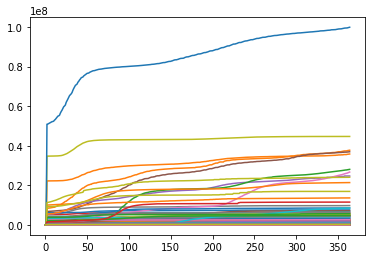

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(ts)):
  plt.plot(ts[i, :365])


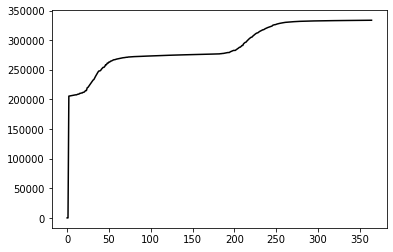

In [ ]:
color ='black'
for i in range(len(ts)):
  if i == (ts[221]).all():
    plt.plot(ts[i, :365], color=color)